In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for visualising data
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# New Section

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# If the file is in your Google Drive (assuming it's in a folder called "datasets")
custom_data = pd.read_excel("/content/drive/MyDrive/datasets/Crime_Economics_data.xlsx")


In [ ]:
y = custom_data['Happiness Index']

# Define the feature variables by excluding the target variable
X = custom_data.drop(columns=['Happiness Index'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: ignored

In [ ]:
# The number of features of testing data
num_features_test = X_test.shape[1]
print('The number of features of testing data is', num_features_test)

# The number of features of training data
num_features_train = X_train.shape[1]
print('The number of features of training data is', num_features_train)

# The number of observations of testing data
num_observations_test = X_test.shape[0]
print('The number of observations of testing data is', num_observations_test)

# The number of observations of training data
num_observations_train = X_train.shape[0]
print('The number of observations of training data is', num_observations_train)

The number of features of testing data is 9
The number of features of training data is 9
The number of observations of testing data is 23
The number of observations of training data is 91


In [ ]:
# Create DataFrames for the training and testing data
train_data_x_df = pd.DataFrame(X_train)
test_data_x_df = pd.DataFrame(X_test)

# Summary Statistics - Independent Variables
print('Summary Statistics - Independent Variables\n')
print(train_data_x_df.describe())

# Create DataFrames for the training and testing targets
train_targets_y_df = pd.DataFrame(y_train)
test_targets_y_df = pd.DataFrame(y_test)

# Summary Statistics - Dependent Variables
print('\nSummary Statistics - Dependent Variables')
print(train_targets_y_df.describe())


Summary Statistics - Independent Variables

       Crime Rate  Unemployment (%)        HDI  \
count   91.000000         91.000000  91.000000   
mean    44.204286          7.909890   0.786374   
std     14.820734          5.899097   0.120808   
min     15.230000          0.700000   0.490000   
25%     31.745000          4.500000   0.715000   
50%     43.030000          6.600000   0.800000   
75%     55.670000          9.400000   0.890000   
max     83.760000         35.300000   0.960000   

       Population Density (per sq. km)  Weapons per 100 persons  \
count                         91.00000                91.000000   
mean                         170.21978                13.320879   
std                          269.93023                15.420034   
min                            2.00000                 0.000000   
25%                           43.00000                 3.000000   
50%                           92.00000                10.000000   
75%                          153.500

In [ ]:
print(test_targets_y_df.describe())

       Happiness Index
count        23.000000
mean          5.533478
std           1.040392
min           2.520000
25%           5.020000
50%           5.650000
75%           6.160000
max           7.360000


## STAGE 2 EXPLORATORY ANALYSIS

In [ ]:
train_data_df = pd.concat([train_data_x_df, train_targets_y_df], axis=1, join='inner')
print('Data before naming columns')
print(train_data_df)
train_data_df.columns = ['CTRY', 'CRIME', 'UNEMP','HDI','POP DNSTY','WPNS','INC','GINI','LTRCY','HAPP']
print('Data after naming columns')
print(train_data_df)
train_data_df.columns


Data before naming columns
                  Country  Crime Rate  Unemployment (%)   HDI  \
31               Ethiopia       49.30               1.5  0.49   
67               Mongolia       56.01               5.9  0.74   
111               Vietnam       46.19               8.8  0.70   
108               Uruguay       51.73              11.1  0.82   
22                Croatia       24.59               7.5  0.85   
..                    ...         ...               ...   ...   
106  United Arab Emirates       15.23               2.4  0.89   
14               Bulgaria       38.21               4.7  0.82   
92               Slovakia       30.37               7.0  0.86   
51                  Japan       22.19               1.6  0.92   
102               Tunisia       43.69              16.2  0.74   

     Population Density (per sq. km)  Weapons per 100 persons  \
31                                99                      0.4   
67                                 2                      7.9 

Index(['CTRY', 'CRIME', 'UNEMP', 'HDI', 'POP DNSTY', 'WPNS', 'INC', 'GINI',
       'LTRCY', 'HAPP'],
      dtype='object')

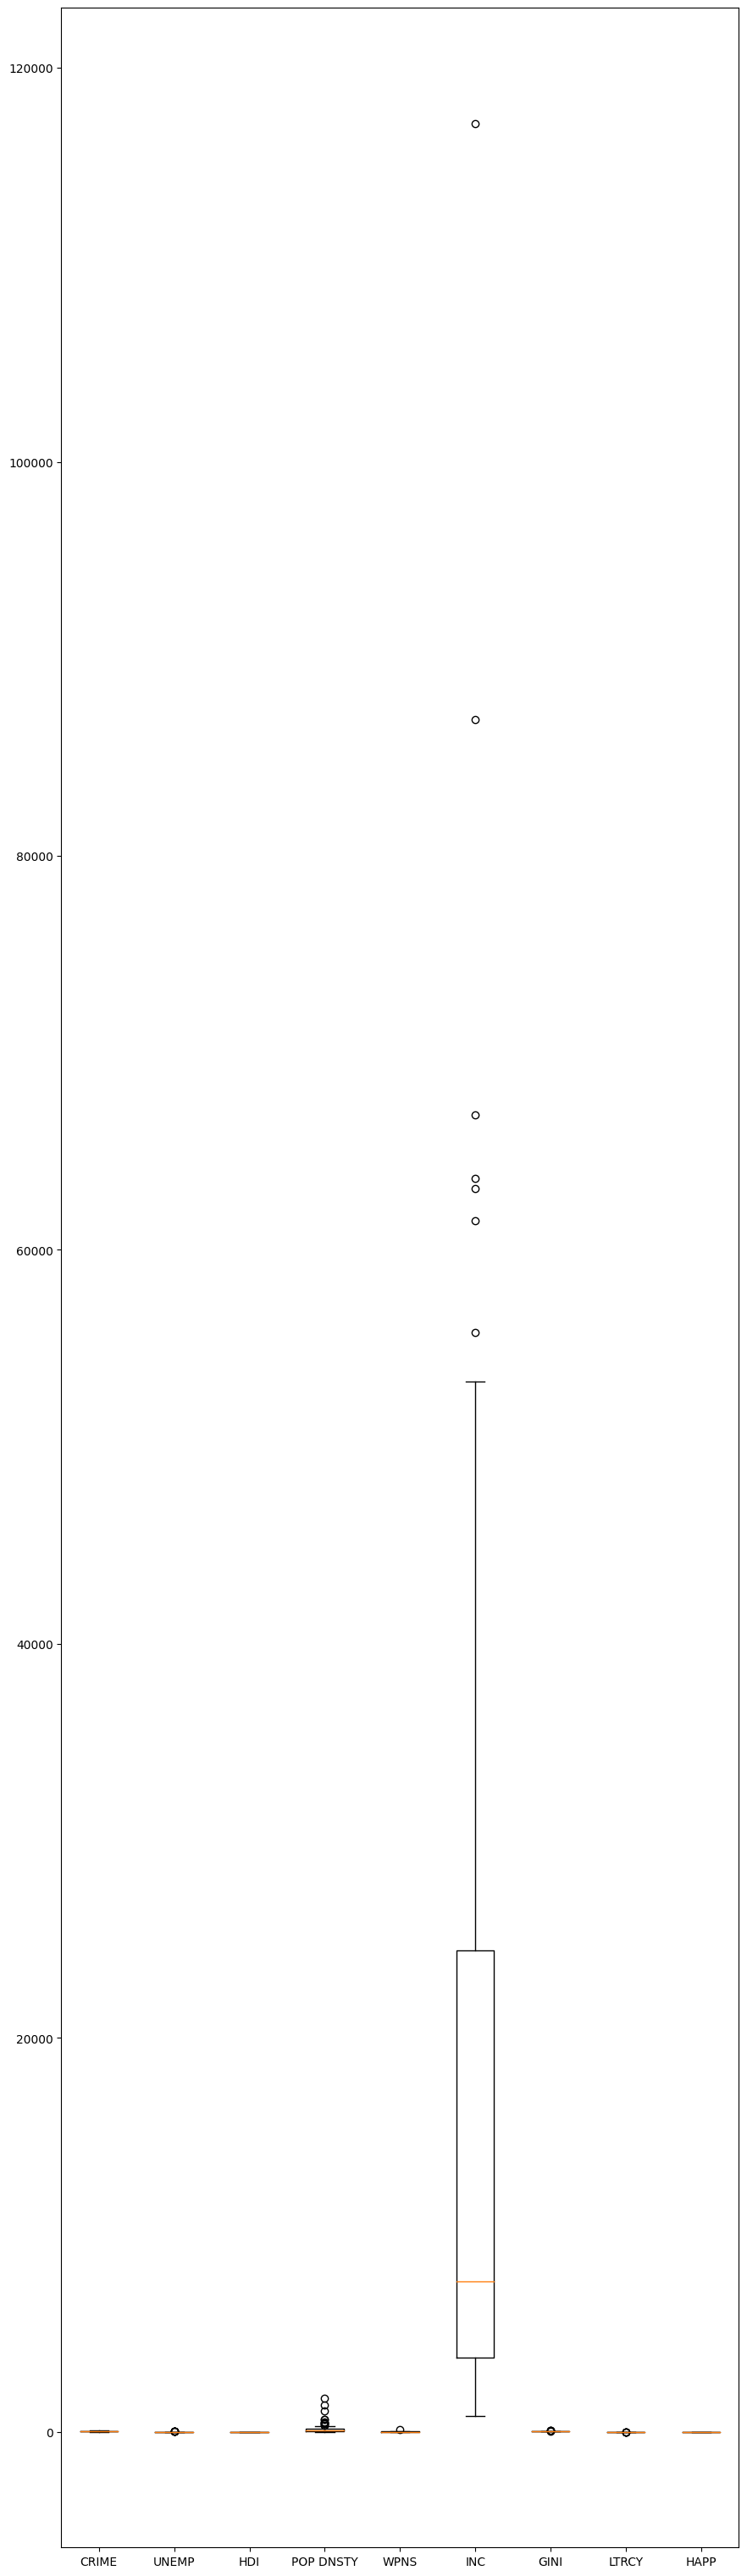

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(8, 6))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 5])
# Creating plot
numeric_columns = train_data_df.select_dtypes(include=['number'])
bp = ax.boxplot(numeric_columns)
plt.xticks([1,2,3,4,5,6,7,8,9],numeric_columns.columns)

# show plot
plt.show()

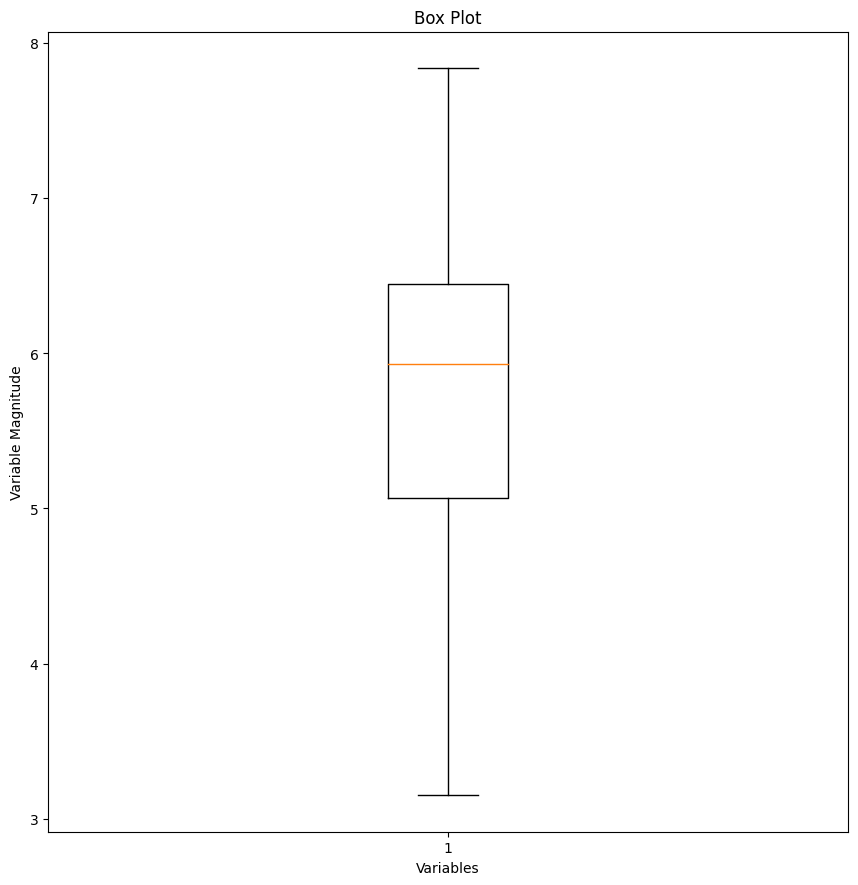

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(8, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Box Plot')
ax.set_xlabel('Variables')
ax.set_ylabel('Variable Magnitude')
# Creating plot
bp = ax.boxplot(train_data_df['HAPP'])
# show plot

plt.show()

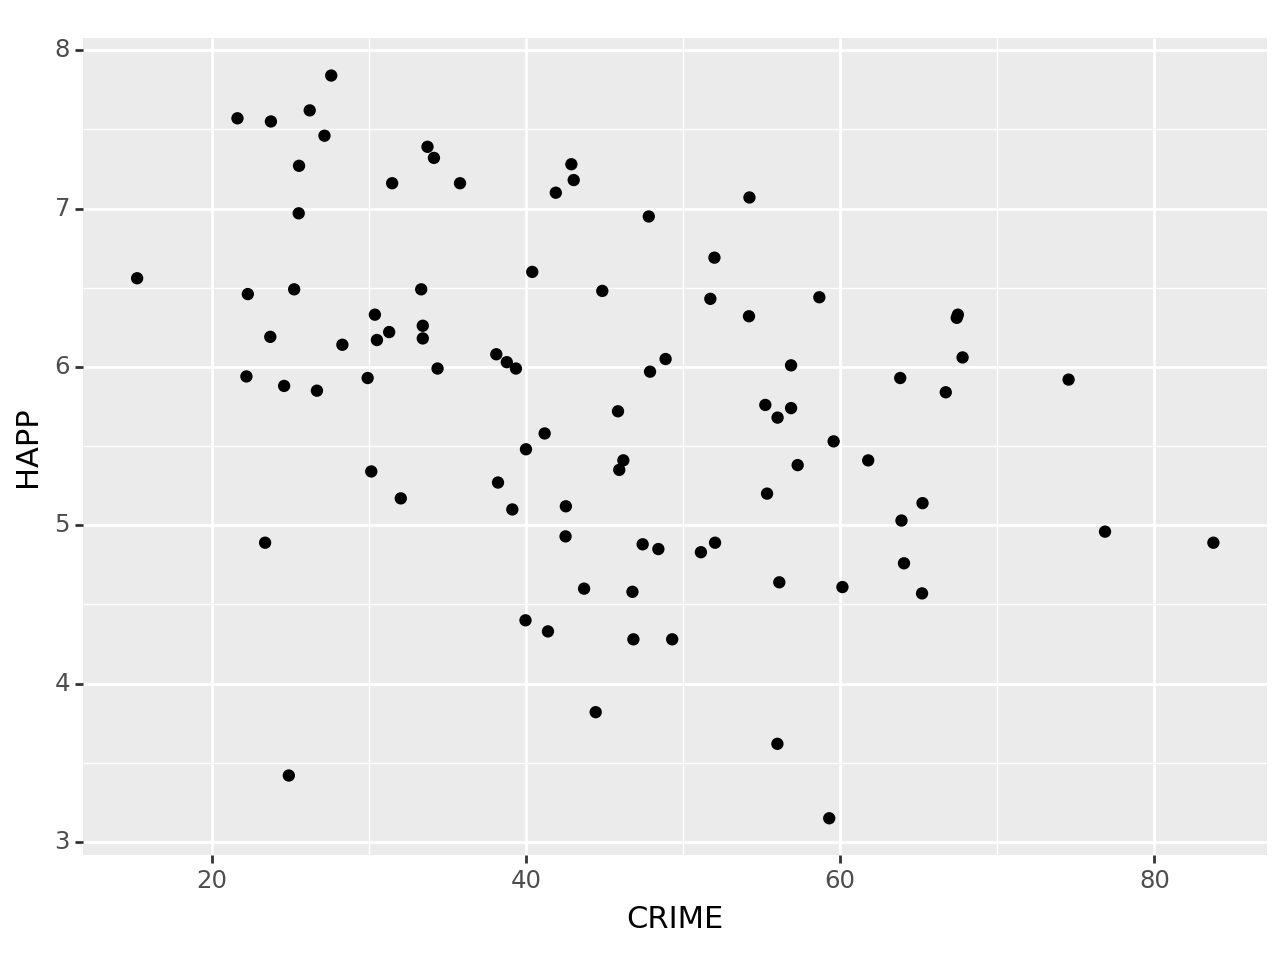

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import *
ggplot(train_data_df, aes(x='CRIME', y='HAPP')) + geom_point()


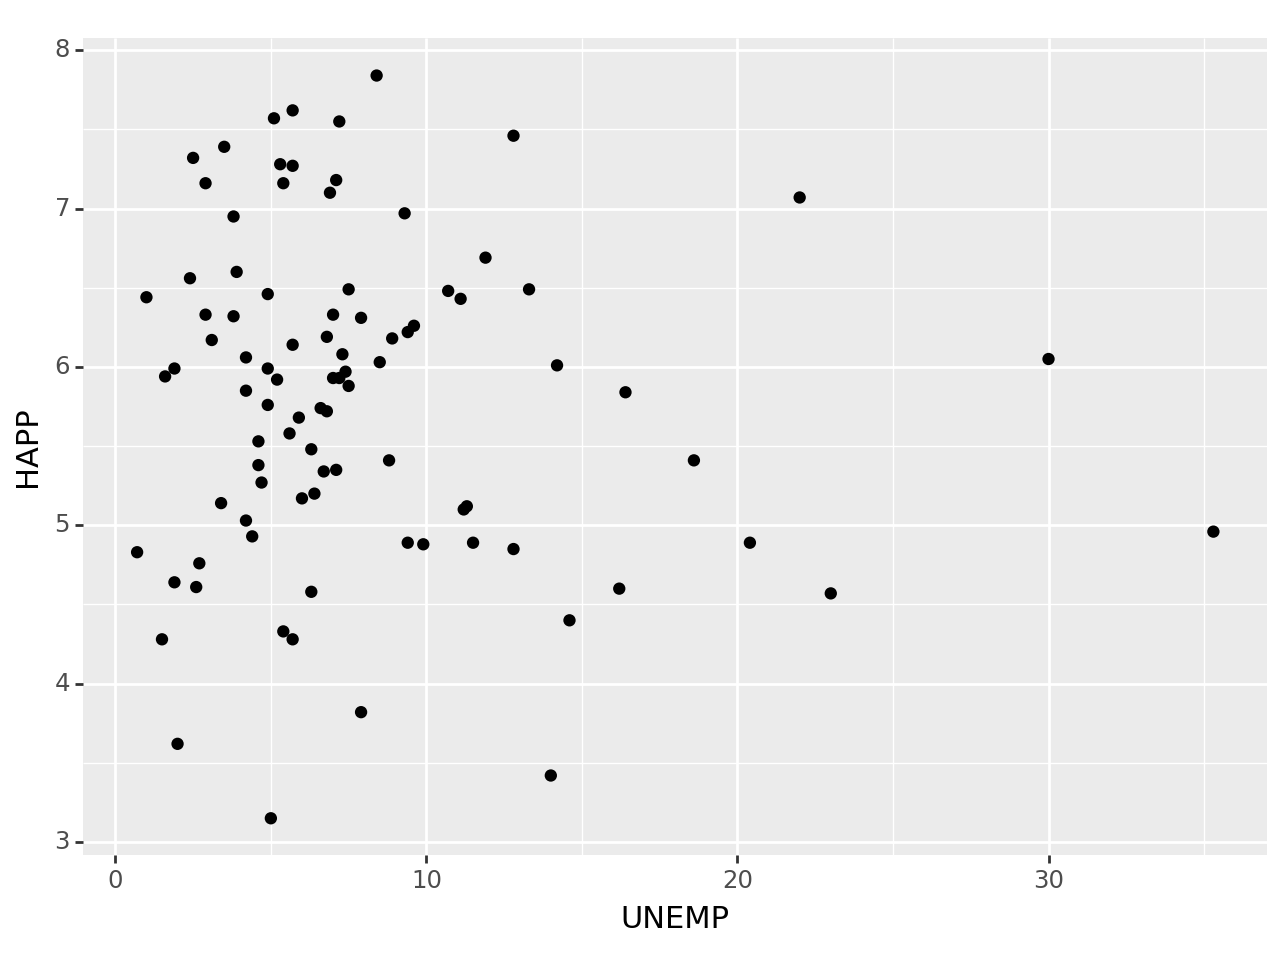

<Figure Size: (640 x 480)>

In [ ]:
ggplot(train_data_df, aes(x='UNEMP', y='HAPP')) + geom_point()


## STAGE 3 - CORRELATION ANALYSIS

     CRIME  UNEMP   HDI  POP DNSTY  WPNS    INC  GINI  LTRCY  HAPP
31   49.30    1.5  0.49         99   0.4    840  35.0   0.49  4.28
67   56.01    5.9  0.74          2   7.9   4007  32.7   0.98  5.68
111  46.19    8.8  0.70        289   1.6   2786  35.7   0.95  5.41
108  51.73   11.1  0.82         20  34.7  15438  41.4   0.98  6.43
22   24.59    7.5  0.85         73  13.7  13934  30.4   0.98  5.88
..     ...    ...   ...        ...   ...    ...   ...    ...   ...
106  15.23    2.4  0.89        115  16.7  36285  32.5   0.94  6.56
14   38.21    4.7  0.82         64   8.4  10058  40.4   0.98  5.27
92   30.37    7.0  0.86        111   6.5  19264  25.2   1.00  6.33
51   22.19    1.6  0.92        337   0.3  39990  32.9   0.99  5.94
102  43.69   16.2  0.74         71   1.1   3318  32.8   0.82  4.60

[91 rows x 9 columns]


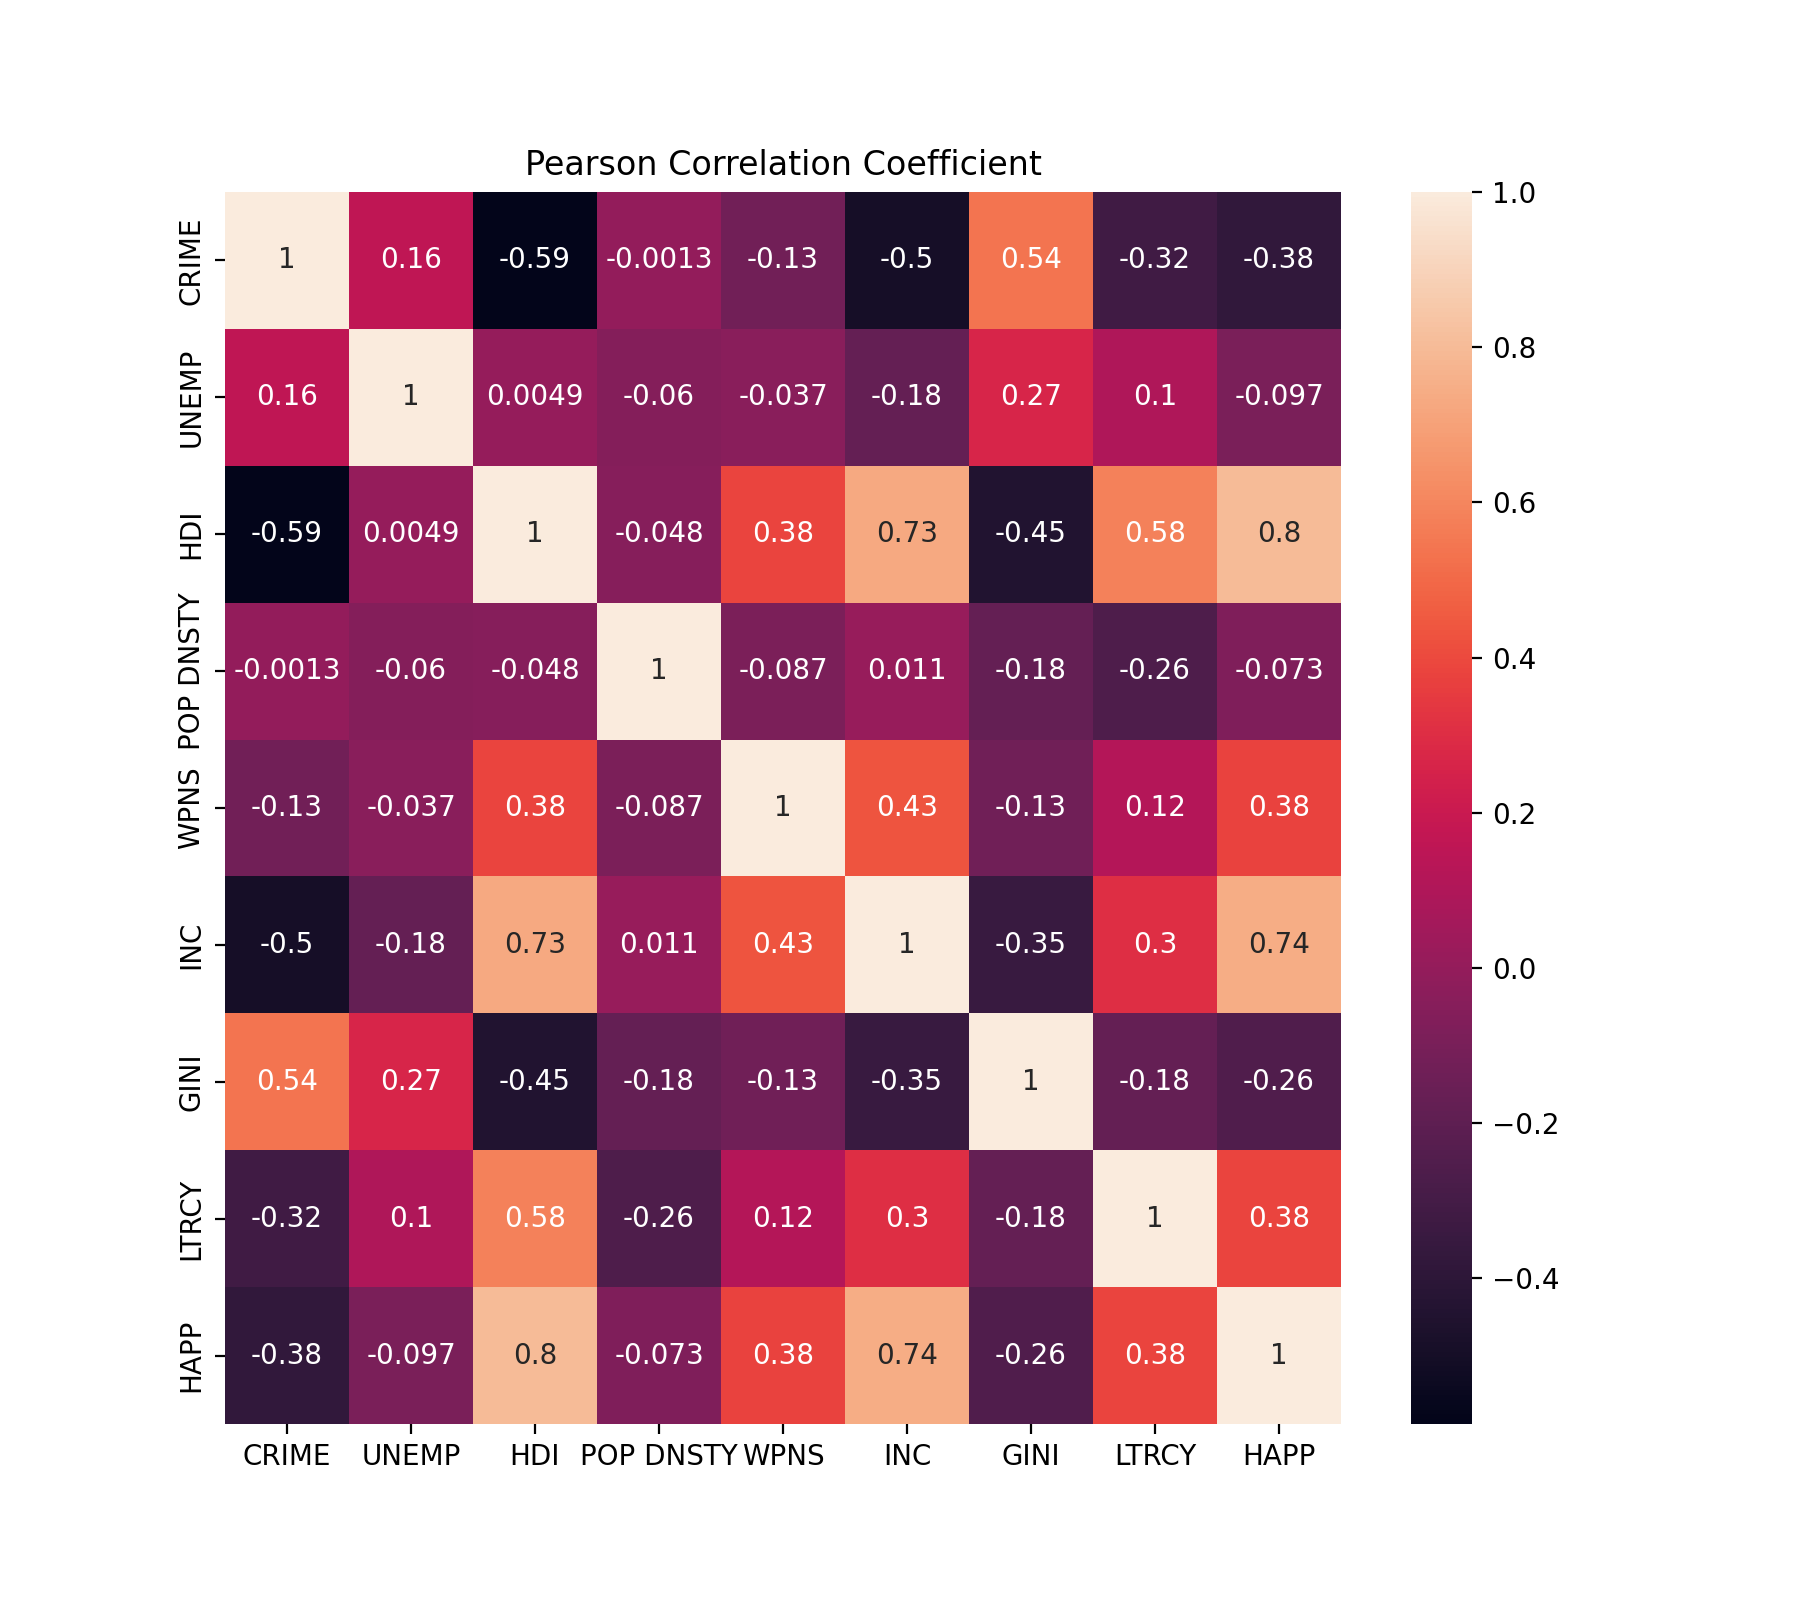

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numerical columns from the DataFrame
numeric_columns = train_data_df.select_dtypes(include=['number'])
print(numeric_columns)
# Create a correlation heatmap for the numerical columns
plt.figure(figsize=(9, 8))
sns.heatmap(numeric_columns.corr(),annot=True)
plt.title('Pearson Correlation Coefficient')
plt.show()


##  MULTIPLE LINEAR REGRESSION MODEL

In [ ]:
train_targets_y_df.describe()

,Happiness Index
count,91.000000
mean,5.802637
std,1.019686
min,3.150000
25%,5.065000
50%,5.930000
75%,6.450000
max,7.840000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

numeric_train_data_x_df = train_data_x_df.select_dtypes(include=[np.number])

# Fit the Linear Regression model with the numeric data
lin_model = LinearRegression()
lin_model.fit(numeric_train_data_x_df, train_targets_y_df)

LinearRegression()

In [ ]:
#display regression coefficients and R-squared value of model
print(lin_model.intercept_, lin_model.coef_, lin_model.score(numeric_train_data_x_df, train_targets_y_df))


[0.41985886] [[ 1.02652425e-02 -1.56775911e-02  6.22180216e+00 -1.83271738e-04
  -1.06007982e-03  1.56068404e-05  1.23687758e-02 -5.92517365e-01]] 0.726986189283376


In [ ]:
import statsmodels.api as sm
#define response variable
#numeric_columns = numerical values of train_data_df
y = numeric_columns['HAPP']
#define predictor variables
x = numeric_columns.loc[:, numeric_columns.columns != 'HAPP']
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
#view model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   HAPP   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     27.29
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           4.00e-20
Time:                        06:47:59   Log-Likelihood:                -71.325
No. Observations:                  91   AIC:                             160.7
Df Residuals:                      82   BIC:                             183.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4199      0.807      0.520      0.6

In [ ]:
# model evaluation for training set
import numpy as np
y_train_predict = lin_model.predict(numeric_train_data_x_df)
rmse = (np.sqrt(mean_squared_error(train_targets_y_df, y_train_predict)))
print('Root Mean Square Error - Training',rmse)
r2 = r2_score(train_targets_y_df, y_train_predict)
print('R2 of the linear regression model - Training :',r2)


Root Mean Square Error - Training 0.5298578140636195
R2 of the linear regression model - Training : 0.726986189283376


In [ ]:
# model evaluation for training set
import numpy as np
numeric_test_data_x_df = test_data_x_df.select_dtypes(include=[np.number])
y_test_predict = lin_model.predict(numeric_test_data_x_df)
rmse = (np.sqrt(mean_squared_error(test_targets_y_df, y_test_predict)))
print('Root Mean Square Error - Testing',rmse)
r2 = r2_score(test_targets_y_df, y_test_predict)
print('R2 of the linear regression model - Testing :',r2)

Root Mean Square Error - Testing 0.6372224280157879
R2 of the linear regression model - Testing : 0.6078126242356849


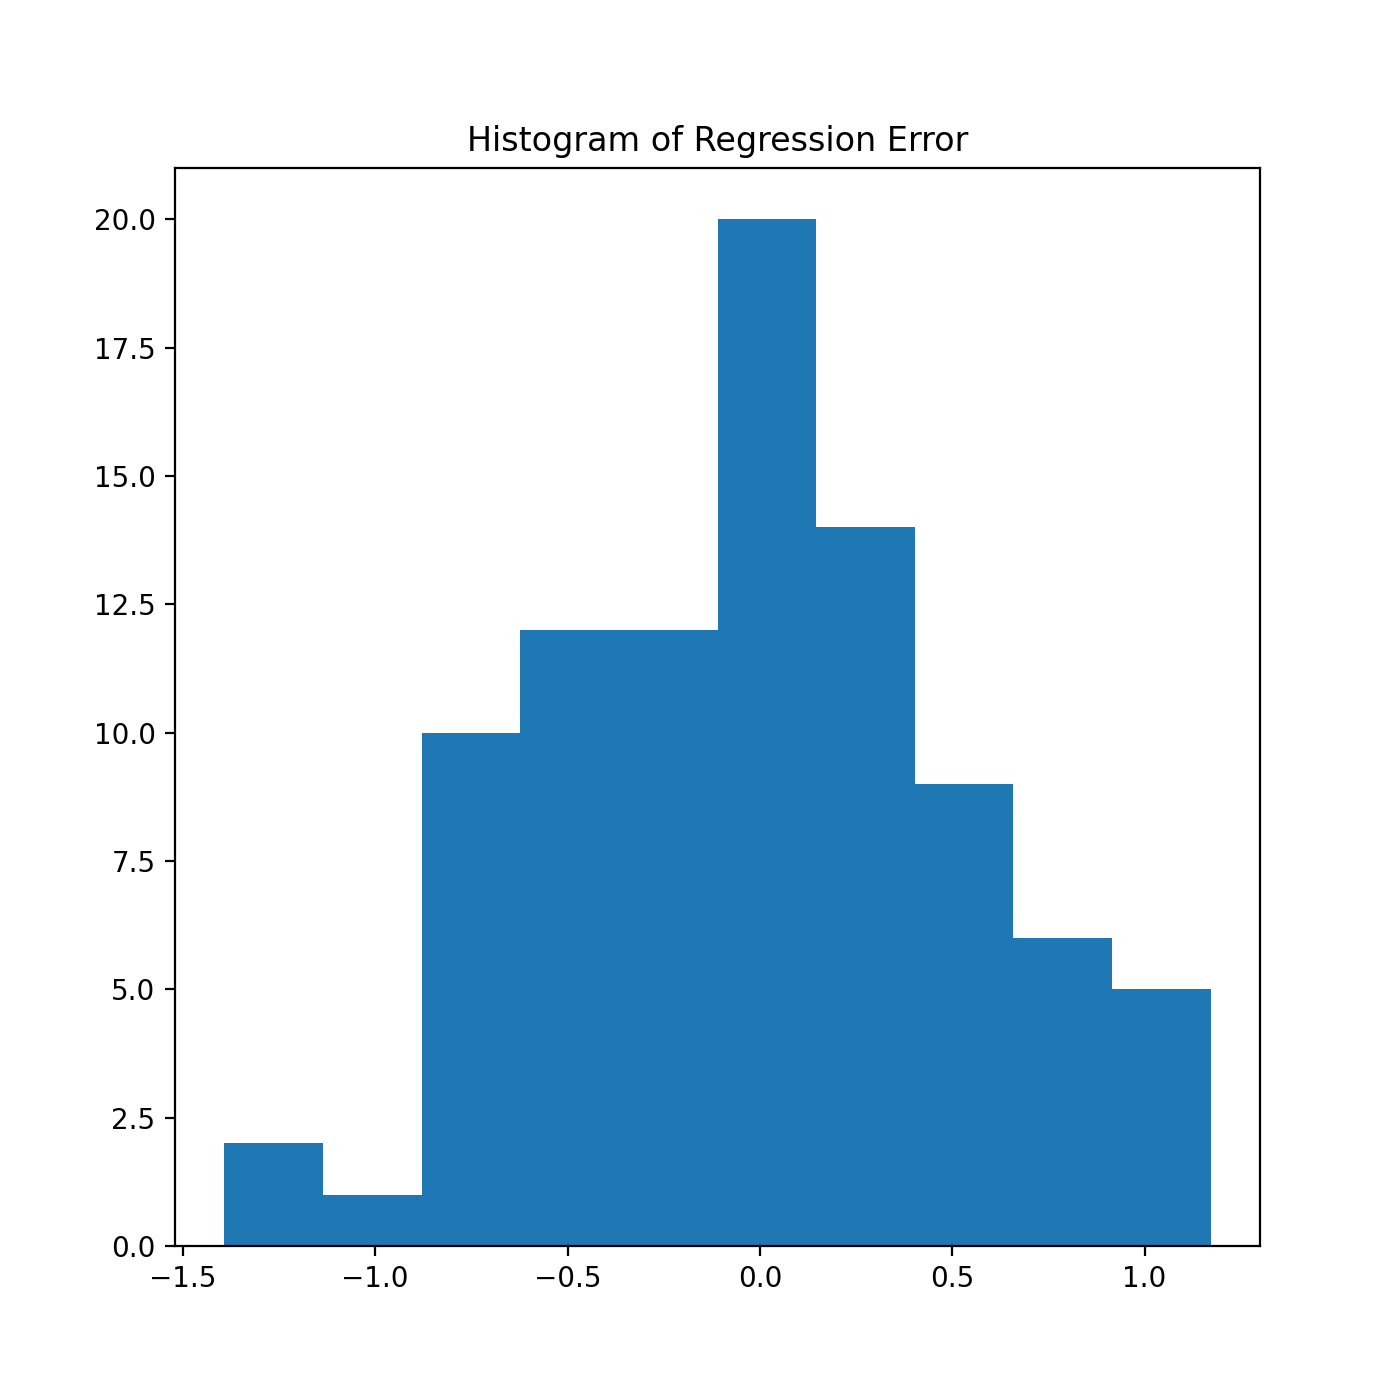

In [ ]:
# model evaluation for training set
import numpy as np
y_train_predict = lin_model.predict(numeric_train_data_x_df)
model_error = train_targets_y_df -  y_train_predict
# Creating histogram
fig, ax = plt.subplots(figsize =(7, 7))
ax.hist(model_error)
# Show plot
plt.title('Histogram of Regression Error')
plt.show()

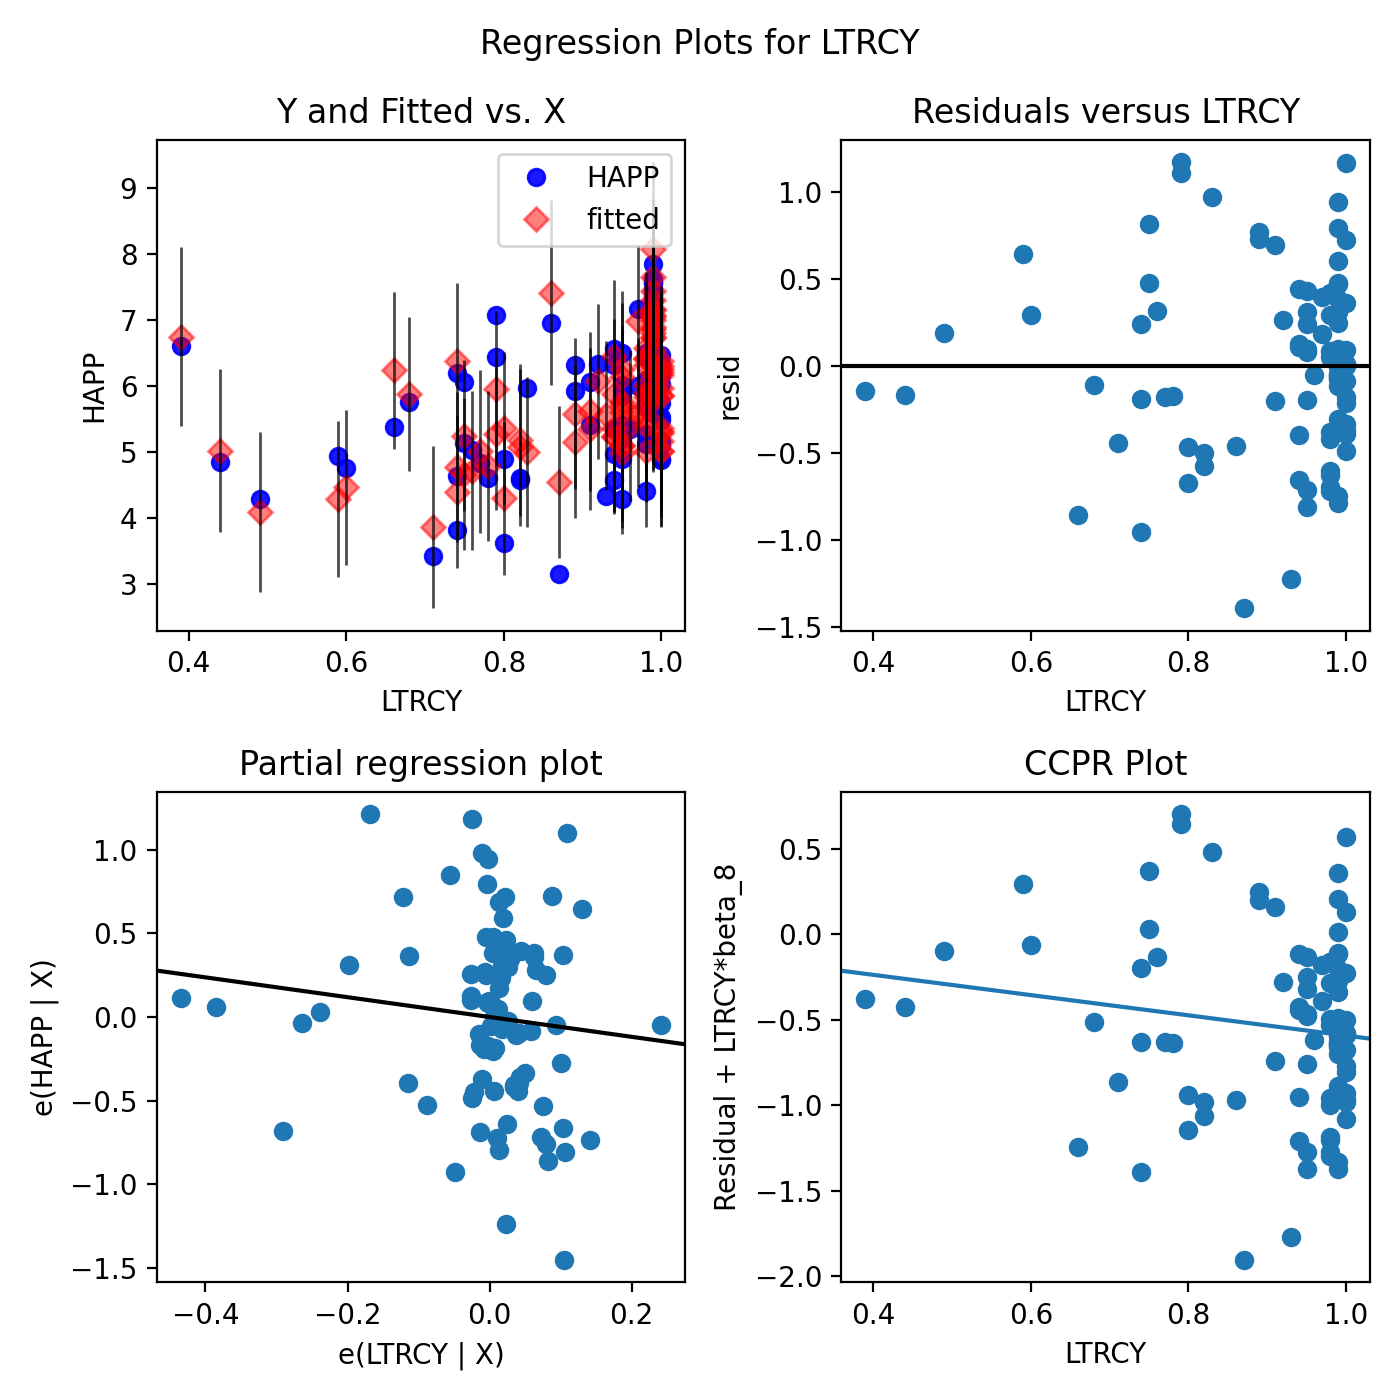

In [ ]:
import statsmodels.api as sm
#define response variable
y = numeric_columns['HAPP']
#define predictor variables
x = numeric_columns.loc[:, numeric_columns.columns != 'HAPP']
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
#view model summary
#print(model.summary())
# modify figure size
fig = plt.figure(figsize=(7, 7))
# creating regression plots
fig = sm.graphics.plot_regress_exog(model, 'LTRCY', fig=fig)


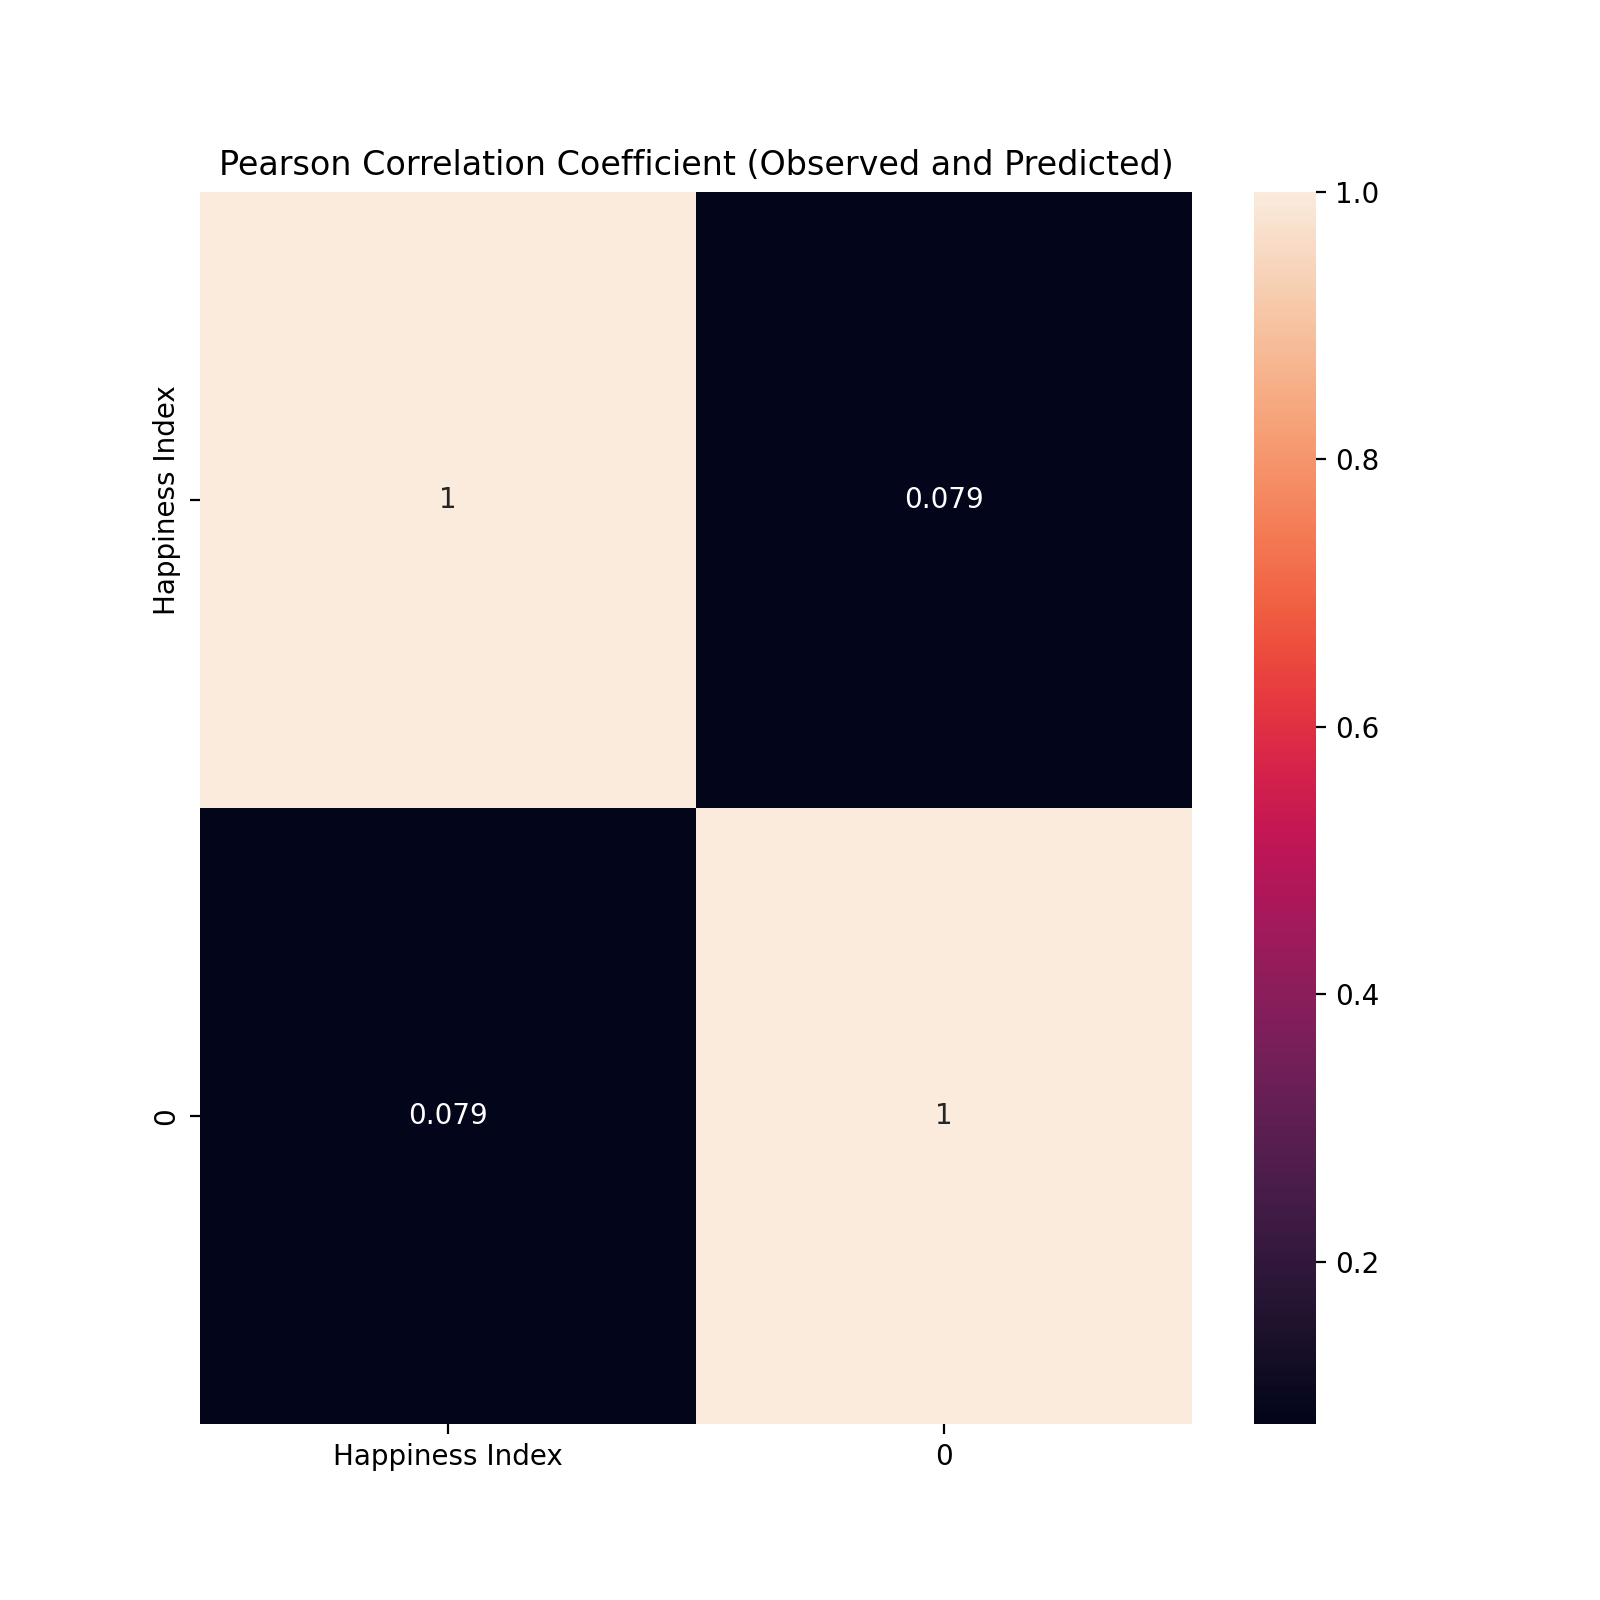

In [ ]:
observed_df = pd.DataFrame(train_targets_y_df)
predicted_df = pd.DataFrame(y_train_predict)
predicted_observed_df = pd.concat([observed_df, predicted_df], axis=1, join='inner')
import seaborn as sns
import matplotlib.pyplot as plt
#plotting the heatmap for correlation
plt.figure(figsize = (8,8))
sns.heatmap(predicted_observed_df.corr(), annot=True)
plt.title('Pearson Correlation Coefficient (Observed and Predicted)')
plt.show()


#The issue with not seeing values in your heatmap is likely due to the fact that the values in your correlation matrix are too small to be displayed
#with annot=True. This can happen when the correlation values are close to zero or have very small magnitudes. When the values are too small,
#they may not be displayed in the heatmap.



